In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 25
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

11490434/11490434 [==============================] - 1s 0us/step
(60000, 784) train input samples
(10000, 784) test input samples


In [4]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


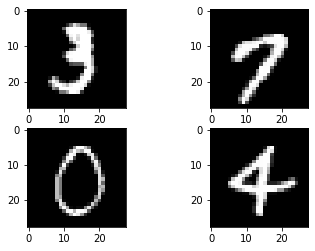

In [5]:
plt.subplot(221)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[210], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[150], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1180 - accuracy: 0.9661
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1161 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1145 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1126 - accuracy: 0.9685
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1111 - accuracy: 0.9680
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1099 - accuracy: 0.9685
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9691
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9693
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9697
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.105

In [11]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.2799 - accuracy: 0.9275 - 627ms/epoch - 2ms/step
Test accuracy: 92.75%
1875/1875 - 3s - loss: 0.0988 - accuracy: 0.9730 - 3s/epoch - 2ms/step
Train accuracy: 97.30%


In [12]:
model2 = keras.Sequential()
model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(128, activation='sigmoid'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3728 - accuracy: 0.8955
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1659 - accuracy: 0.9500
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1162 - accuracy: 0.9645
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0741 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0629 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

In [14]:
loss, acc = model2.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model2.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.0941 - accuracy: 0.9770 - 624ms/epoch - 2ms/step
Test accuracy: 97.70%
1875/1875 - 3s - loss: 0.0258 - accuracy: 0.9925 - 3s/epoch - 2ms/step
Train accuracy: 99.25%


In [20]:
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7825 - accuracy: 0.8542
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7744 - accuracy: 0.8546
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7713 - accuracy: 0.8556
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7656 - accuracy: 0.8565
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7625 - accuracy: 0.8558
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7561 - accuracy: 0.8594
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7515 - accuracy: 0.8592
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7479 - accuracy: 0.8606
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7450 - accuracy: 0.8607
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6148 - accuracy: 0.8879
Epoch 80/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6125 - accuracy: 0.8881
Epoch 81/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6111 - accuracy: 0.8886
Epoch 82/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6113 - accuracy: 0.8898
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6114 - accuracy: 0.8883
Epoch 84/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6106 - accuracy: 0.8897
Epoch 85/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6088 - accuracy: 0.8886
Epoch 86/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6074 - accuracy: 0.8896
Epoch 87/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6062 - accuracy: 0.8899
Epoch 88/100
1875/1875 [==============================] - 6s 3ms/step - loss:

In [26]:
loss, acc = model_r.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model_r.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.9086 - accuracy: 0.8510 - 694ms/epoch - 2ms/step
Test accuracy: 85.10%
1875/1875 - 4s - loss: 0.5733 - accuracy: 0.8998 - 4s/epoch - 2ms/step
Train accuracy: 89.98%


In [28]:
from tensorflow.keras.layers import Dropout

In [29]:
model_rd = keras.Sequential()
model_rd.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_rd.add(Dropout(0.7))
model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))
model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_rd.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8248 - accuracy: 0.7322
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4294 - accuracy: 0.8759
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3682 - accuracy: 0.8972
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3371 - accuracy: 0.9075
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3184 - accuracy: 0.9143
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.9202
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2964 - accuracy: 0.9229
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.9276
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2786 - accuracy: 0.9292
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.270

In [31]:
loss, acc = model_rd.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model_rd.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 0.1858 - accuracy: 0.9544 - 637ms/epoch - 2ms/step
Test accuracy: 95.44%
1875/1875 - 3s - loss: 0.1560 - accuracy: 0.9607 - 3s/epoch - 2ms/step
Train accuracy: 96.07%


In [33]:
# EARLY STOPPING METHOD
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

In [36]:
checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3744 - accuracy: 0.8944 - val_loss: 0.1989 - val_accuracy: 0.9416
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1683 - accuracy: 0.9492 - val_loss: 0.1483 - val_accuracy: 0.9534
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9645 - val_loss: 0.1127 - val_accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.0992 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0721 - accuracy: 0.9784 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0937 - val_accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9850 - val_loss: 0.0968 - val_accuracy:

In [37]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2)
model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.1013 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.1038 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.1121 - val_accuracy: 0.9745


In [44]:
# Using LEarning rates now.
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                15700     
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________


In [45]:
opt_new = keras.optimizers.SGD(learning_rate=10)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4196 - accuracy: 0.5569
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9477 - accuracy: 0.7383
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7737 - accuracy: 0.7938
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6970 - accuracy: 0.8140
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5912 - accuracy: 0.8511
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6390 - accuracy: 0.8315
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6072 - accuracy: 0.8466
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954 - accuracy: 0.8441
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6514 - accuracy: 0.8235
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.639

In [47]:
# too low learning rate
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                15700     
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4651 - accuracy: 0.1124
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4618 - accuracy: 0.1123
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4586 - accuracy: 0.1123
Epoch 4

In [48]:
# optimal learning rate
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                15700     
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2533 - accuracy: 0.2392
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0421 - accuracy: 0.4538
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7108 - accuracy: 0.5248
Epoch 4

In [58]:
# optimal learning rate with momentum
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                15700     
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1416 - accuracy: 0.3215
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5759 - accuracy: 0.5187
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1739 - accuracy: 0.6662
Epoch 4

In [67]:
# Mini-batch SGD
# the default minibatch size is 32 unlike 1.
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(10, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, batch_size=512, epochs=10)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                15700     
                                                                 
 dense_61 (Dense)            (None, 10)                210       
                                                                 
 dense_62 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 2.1100 - accuracy: 0.3083
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 1.7772 - accuracy: 0.5403
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 1.5238 - accuracy: 0.5899
Epoch 4/10
11